# Section 33 Part 3:  K-Nearest Neighbour Algorithm Wine and Penguis
#### Lecture 202:  The Main Idea
#### Lecture 203:  Data Preprocessing Wine
#### Lecture 204:  Fit the KNN Classifier (Wine)
#### Lecture 205:  KNN Regression Penguins
#### Lecture 206:  Hyper-perameter Tuning by Hand
#### Lecture 207:  Hyper-peraneter Tuning via GridSearchCV

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.datasets import load_wine

warnings.filterwarnings('ignore')

#### Example:  Wine Classification:

In [74]:
X, y = load_wine(return_X_y = True, as_frame = True)

In [75]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [76]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [77]:
y.unique()

array([0, 1, 2])

In [78]:
X.shape

(178, 13)

In [79]:
y.shape

(178,)

In [80]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Step 1:  train test split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Step 2:  Scale Data:

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

In [83]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,2.964475e-15,-1.029642e-16,1.772775e-16,-6.652385e-16,6.267388e-18,-7.162729e-18,3.563458e-16,-2.891952e-16,-3.223228e-16,2.489048e-16,2.005564e-16,-6.410643e-16,1.092316e-16
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-2.283382e+00,-1.463931e+00,-2.614819e+00,-2.593583e+00,-2.101831e+00,-1.897302e+00,-1.532661e+00,-1.851092e+00,-2.177548e+00,-1.542520e+00,-2.011894e+00,-1.941127e+00,-1.433654e+00
25%,-7.892115e-01,-6.693333e-01,-5.764278e-01,-5.962288e-01,-7.743588e-01,-8.739850e-01,-9.014079e-01,-7.543359e-01,-5.871523e-01,-8.140783e-01,-7.478643e-01,-9.384573e-01,-7.788849e-01
50%,-4.810267e-02,-4.269136e-01,-1.001682e-01,9.030072e-03,-1.843711e-01,-6.995023e-02,1.070883e-01,-2.059577e-01,-9.816501e-02,-1.664590e-01,-3.618366e-02,2.706448e-01,-2.602557e-01
75%,8.483999e-01,6.841768e-01,7.475740e-01,6.142890e-01,5.531134e-01,8.640295e-01,8.012154e-01,8.124589e-01,6.614269e-01,4.749431e-01,7.498516e-01,8.235878e-01,6.052069e-01
max,2.258897e+00,3.079194e+00,3.214599e+00,3.035325e+00,3.871794e+00,2.618287e+00,3.104913e+00,2.300914e+00,2.664851e+00,3.315142e+00,3.214178e+00,1.818885e+00,2.679724e+00


In [84]:
X_test = scaler.transform(X_test)

##### Step 3:  K Nearest Neighbour

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
knn.predict(X_train)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1])

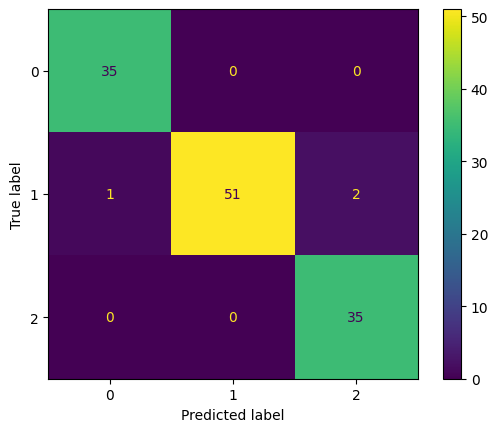

In [93]:
metrics.ConfusionMatrixDisplay.from_estimator(knn,X_train, y_train).figure_.savefig(r'output/Wine_conf_mat.png')

In [91]:
knn.score(X_train, y_train)

0.9758064516129032

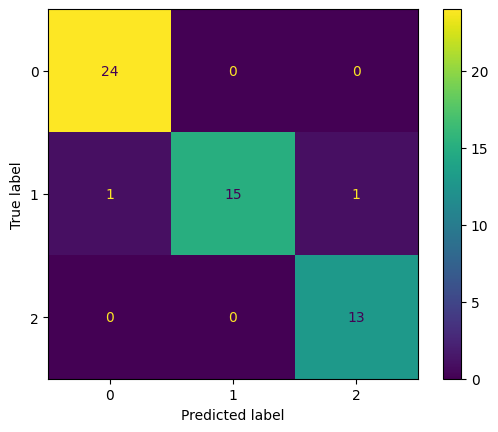

In [94]:
metrics.ConfusionMatrixDisplay.from_estimator(knn,X_test, y_test).figure_.savefig(r'output/Wine_conf_mat_X_test.png')

In [95]:

knn.score(X_test, y_test)

0.9629629629629629

#### Example 2:  KNN Regression on Penguins Dataset

In [100]:
penguins = sns.load_dataset(name='penguins')

##### Steo 1:  Cleaning and Splitting the Dataset

In [101]:
penguins = penguins.dropna()

In [102]:
X_p = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y_p = penguins.body_mass_g

In [103]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p)

##### Step 2: Scaling X

In [104]:
scaler_p = StandardScaler()
X_train_p = scaler_p.fit_transform(X_train_p)
X_test = scaler_p.fit(X_test_p)

##### Step 3:  Fit KNN Regression Model:

In [105]:
knn_p = KNeighborsRegressor(n_neighbors=6)
knn_p.fit(X_train_p, y_train_p)


KNeighborsRegressor(n_neighbors=6)

In [106]:
pred_p = knn_p.predict(X_train_p)
pred_p

array([3216.66666667, 4700.        , 5395.83333333, 5516.66666667,
       4129.16666667, 5300.        , 5187.5       , 3579.16666667,
       4204.16666667, 3958.33333333, 4400.        , 3783.33333333,
       3929.16666667, 4100.        , 4720.83333333, 3541.66666667,
       4504.16666667, 5162.5       , 5650.        , 3358.33333333,
       4800.        , 3379.16666667, 5058.33333333, 5016.66666667,
       4800.        , 5016.66666667, 5516.66666667, 5566.66666667,
       3270.83333333, 3604.16666667, 3883.33333333, 4083.33333333,
       3800.        , 3279.16666667, 3637.5       , 3495.83333333,
       5533.33333333, 3804.16666667, 3291.66666667, 3404.16666667,
       3945.83333333, 3545.83333333, 3545.83333333, 5345.83333333,
       3437.5       , 3925.        , 3450.        , 4720.83333333,
       5229.16666667, 3558.33333333, 3245.83333333, 5225.        ,
       3529.16666667, 4833.33333333, 3291.66666667, 3508.33333333,
       3550.        , 5383.33333333, 4058.33333333, 3487.5    

In [108]:
knn_p.score(X_train_p, y_train_p)

0.8754356427221095

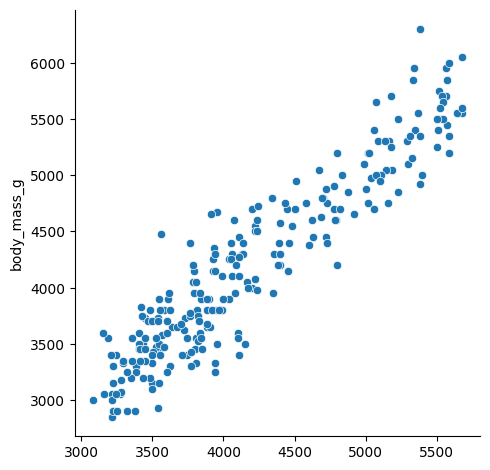

In [111]:
sns.relplot(y=y_train_p, x=pred_p).fig.savefig(r'output/Penguins_relplot_testset.png')

##### Hyper-Parameter Tuning (Manual):

In [124]:
# As tutor did it, I can't get my results to match his - mine range from -3 to -5

results = []
for k in range(1, 11):
    Knn_regressor = KNeighborsRegressor(n_neighbors= k)
    Knn_regressor.fit(X_train_p, y_train_p)
    score = Knn_regressor.score(X_test_p, y_test_p)
    results.append((f'k: {k}', score))

In [123]:
results

[('k: 1', -5.25129435139235),
 ('k: 2', -4.162723574871011),
 ('k: 3', -4.162723574871011),
 ('k: 4', -3.848446218972483),
 ('k: 5', -3.5702042770650317),
 ('k: 6', -3.542743801209104),
 ('k: 7', -3.330186019662505),
 ('k: 8', -3.285298903437134),
 ('k: 9', -3.429178730126056),
 ('k: 10', -3.33674042716952)]

In [130]:
# Try setting both the fit and score to test:

results = []
for k in range(1, 11):
    Knn_regressor = KNeighborsRegressor(n_neighbors= k)
    Knn_regressor.fit(X_test_p, y_test_p)
    score = Knn_regressor.score(X_test_p, y_test_p)
    results.append((f'k: {k}', score))
results
# Gets closer but I am still getting 100% for n_number = 1, main reason tutor went with test rather than train.
# Reason for 100% on training set is that n_number = 1 compares the point to itself.  The training set should be further split into 2
# He will not be covering doing this manually in this course but rather will be using
# a built in function.

[('k: 1', 1.0),
 ('k: 2', 0.9044422990007652),
 ('k: 3', 0.8603551094623761),
 ('k: 4', 0.866092209671501),
 ('k: 5', 0.8497163390328052),
 ('k: 6', 0.842459983622036),
 ('k: 7', 0.8285530177453515),
 ('k: 8', 0.816980499567058),
 ('k: 9', 0.8061399797173119),
 ('k: 10', 0.8032014109213277)]

In [131]:
# This way will do it properly and easily
parameter_grid = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=parameter_grid, refit=True, verbose=3,n_jobs=-1, cv=5)

In [132]:
grid.fit(X_train_p, y_train_p)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

In [133]:
grid.best_params_

{'n_neighbors': 10}

In [134]:
grid.cv_results_

{'mean_fit_time': array([0.00211992, 0.00238853, 0.00133777, 0.00104661, 0.00130696,
        0.00183506, 0.        , 0.00120468, 0.00040832, 0.00101523]),
 'std_fit_time': array([0.00423985, 0.00394587, 0.00084066, 0.00209322, 0.00039638,
        0.00256632, 0.        , 0.00147543, 0.00081663, 0.00203047]),
 'mean_score_time': array([0.        , 0.00110469, 0.00180035, 0.00185523, 0.00090418,
        0.00294194, 0.        , 0.00231271, 0.00243878, 0.        ]),
 'std_score_time': array([0.        , 0.00136238, 0.00146391, 0.00224385, 0.00073827,
        0.00272477, 0.        , 0.00240328, 0.0022788 , 0.        ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [137]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [138]:
grid.cv_results_['mean_test_score']

array([0.69543955, 0.7857214 , 0.79510713, 0.80619718, 0.81742517,
       0.81631824, 0.81811835, 0.81851609, 0.82056817, 0.82080519])

In [149]:
# Tutor got highest mean result with n_neighbors set to 10, mine gave 9 so using 9 instead.
knn_p_grid = KNeighborsRegressor(n_neighbors=9)
knn_p_grid.fit(X_train_p, y_train_p)

KNeighborsRegressor(n_neighbors=9)

In [150]:
pred_p_grid = knn_p_grid.predict(X_train_p)

In [141]:
pred_p_grid

array([3261.11111111, 4666.66666667, 5341.66666667, 5605.55555556,
       4133.33333333, 5350.        , 5097.22222222, 3680.55555556,
       3975.        , 3972.22222222, 4472.22222222, 3852.77777778,
       3816.66666667, 3847.22222222, 4608.33333333, 3427.77777778,
       4569.44444444, 5058.33333333, 5588.88888889, 3402.77777778,
       4694.44444444, 3436.11111111, 4922.22222222, 5116.66666667,
       4788.88888889, 5063.88888889, 5661.11111111, 5516.66666667,
       3372.22222222, 3591.66666667, 3936.11111111, 3938.88888889,
       3955.55555556, 3216.66666667, 3725.        , 3505.55555556,
       5538.88888889, 3813.88888889, 3411.11111111, 3341.66666667,
       4013.88888889, 3452.77777778, 3580.55555556, 5394.44444444,
       3500.        , 3916.66666667, 3572.22222222, 4700.        ,
       5261.11111111, 3661.11111111, 3205.55555556, 5255.55555556,
       3533.33333333, 4775.        , 3177.77777778, 3472.22222222,
       3566.66666667, 5461.11111111, 3997.22222222, 3483.33333

In [151]:
knn_p_grid.score(X_train_p, y_train_p)

0.8568960033607019

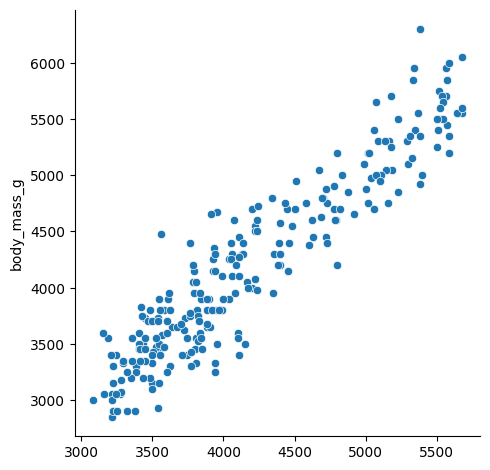

In [152]:
sns.relplot(y=y_train_p, x=pred_p).fig.savefig(r'output/Penguins_relplot_trainSetGrid.png')